## Cats v Dogs Model

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

First, import all the stuff we need from fastai:

In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

In [3]:
#|export
def is_cat(x): return x[0].isupper() 

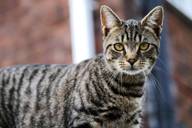

In [4]:
im = PILImage.create('cat.jpg')
im.thumbnail((192,192))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [6]:
learn.predict(im)

('True', tensor(1), tensor([1.0530e-13, 1.0000e+00]))

In [7]:
#|export
labels = ['Dog','Cat']
def classify_image(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [8]:
re = classify_image(im)
re

{'Dog': 1.0529972076581129e-13, 'Cat': 1.0}

In [9]:
#|export
image = gr.components.Image()
label = gr.components.Label(show_label=True)
examples = ['dog.jpg','cat.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [12]:
import nbdev
nbdev.export.nb_export('hugging-space-model-app.ipynb', 'app')
print('Export successful')

Export successful
